In [107]:
from google.colab import drive

In [108]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
file=pd.read_csv("/content/drive/MyDrive/0.MKCE/Datasets/insurance_data.csv")

In [111]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [112]:
file.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [113]:
file.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


In [114]:
file.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [115]:
import seaborn as sns

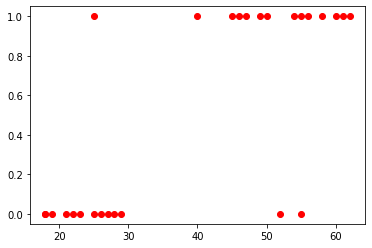

In [116]:
plt.scatter(file.age,file.bought_insurance,color='red')

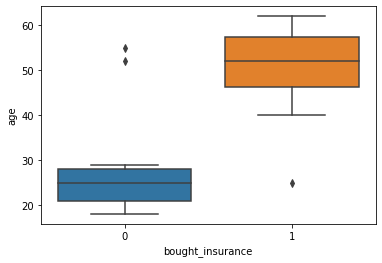

In [117]:
sns.boxplot(x=file["bought_insurance"],y=file["age"])

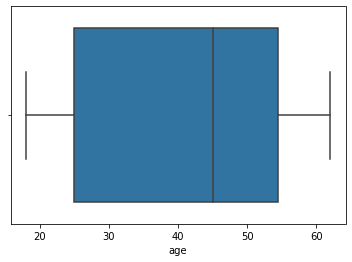

In [118]:
sns.boxplot(x=file["age"])

<BarContainer object of 27 artists>

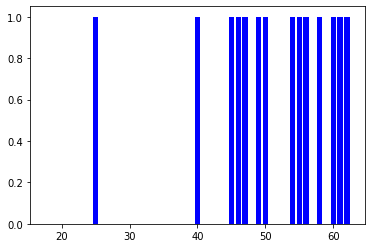

In [119]:
plt.bar(file["age"],color="blue",height=file["bought_insurance"].values)


(array([5., 4., 3., 0., 0., 1., 3., 3., 4., 4.]),
 array([18. , 22.4, 26.8, 31.2, 35.6, 40. , 44.4, 48.8, 53.2, 57.6, 62. ]),
 <a list of 10 Patch objects>)

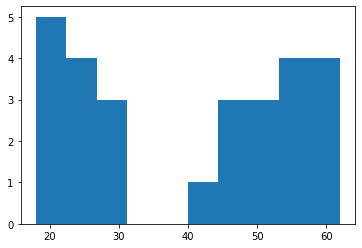

In [120]:
plt.hist(file.age)


(array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

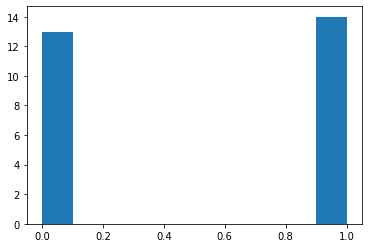

In [121]:
plt.hist(file.bought_insurance)


In [122]:
x=file["age"]
y=file["bought_insurance"]

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train.shape
x_test.shape

(11, 1)

In [125]:
y_train.shape
y_test.shape

(11, 1)

In [126]:
x=file["age"].values.reshape(-1,1)
x

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [27],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [40],
       [45],
       [50],
       [54],
       [23]])

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=6)

In [128]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [129]:
ypred=model.predict(x_test)
model.predict_proba(x_test)


array([[0.10452984, 0.89547016],
       [0.89621105, 0.10378895],
       [0.0929369 , 0.9070631 ],
       [0.30075042, 0.69924958],
       [0.20336622, 0.79663378],
       [0.18305253, 0.81694747],
       [0.05732683, 0.94267317],
       [0.92737584, 0.07262416],
       [0.24888705, 0.75111295],
       [0.04475431, 0.95524569],
       [0.81813188, 0.18186812]])

In [130]:
x_test

array([[55],
       [22],
       [56],
       [45],
       [49],
       [50],
       [60],
       [19],
       [47],
       [62],
       [27]])

In [131]:
y_pred=model.predict([[23]])
y_pred


array([0])

MEASURING ACCURACY OF A MODEL


In [132]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [133]:
accuracy_score(y_test,ypred)

0.9090909090909091

In [134]:
#accuracy score comes from confusion matrix
confusion_matrix(y_test,ypred)

array([[3, 1],
       [0, 7]])

In [135]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.88      1.00      0.93         7

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11

